<a href="https://colab.research.google.com/github/diegotluz/projects-colab/blob/main/Exemplo_Predi%C3%A7%C3%A3o_de_S%C3%A9ries_Temporais_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

In [5]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
np.random.seed(7)

#Carrega o dataset
#international airline passengers problem with time step regression framing
dataframe = read_csv('https://telescopeinstorage.blob.core.windows.net/datasets/AirPassengers.csv', usecols=[1], engine='python')
dataframe.head(150)

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [7]:
X = dataframe.values
X = X.astype('float32')

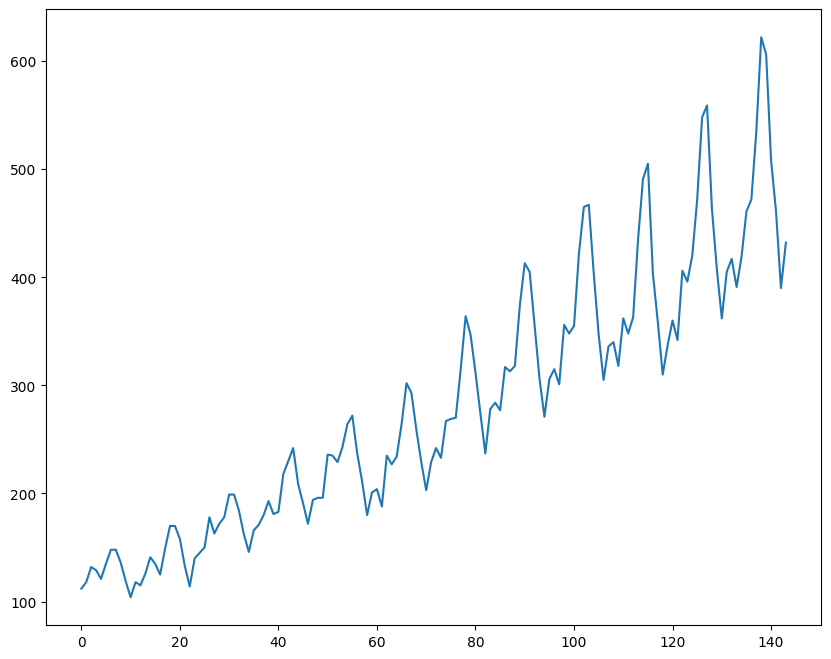

In [8]:
plt.figure(figsize=(10,8))
plt.plot(dataframe)

In [9]:
#Normaliza o dataset
scaler = MinMaxScaler(feature_range=(0, 1))

#scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size

train = X[0:train_size,:]
test =  X[train_size:len(X),:]

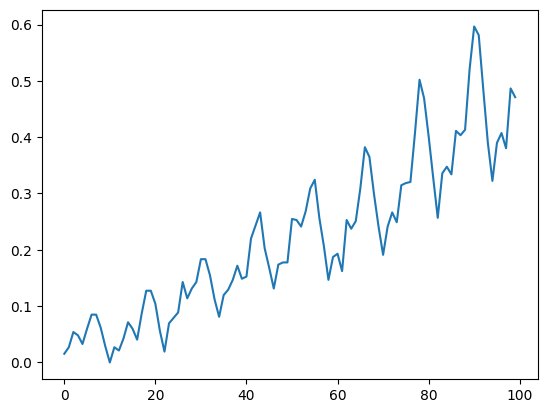

In [11]:
plt.plot(train)

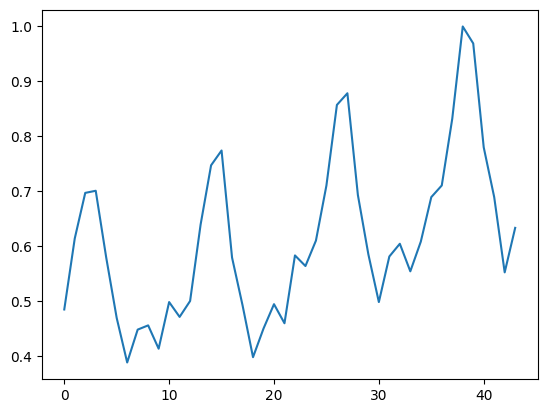

In [12]:
plt.plot(test)

In [13]:
# quantidade de atrasos
look_back = 3

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)


In [14]:
X_train

array([[0.01544401, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853],
       [0.04826255, 0.03281853, 0.05984557],
       [0.03281853, 0.05984557, 0.08494207],
       [0.05984557, 0.08494207, 0.08494207],
       [0.08494207, 0.08494207, 0.06177607],
       [0.08494207, 0.06177607, 0.02895753],
       [0.06177607, 0.02895753, 0.        ],
       [0.02895753, 0.        , 0.02702703],
       [0.        , 0.02702703, 0.02123553],
       [0.02702703, 0.02123553, 0.04247104],
       [0.02123553, 0.04247104, 0.07142857],
       [0.04247104, 0.07142857, 0.05984557],
       [0.07142857, 0.05984557, 0.04054055],
       [0.05984557, 0.04054055, 0.08687258],
       [0.04054055, 0.08687258, 0.12741312],
       [0.08687258, 0.12741312, 0.12741312],
       [0.12741312, 0.12741312, 0.10424709],
       [0.12741312, 0.10424709, 0.05598456],
       [0.10424709, 0.05598456, 0.01930502],
       [0.05598456, 0.01930502, 0.06949806],
       [0.

In [15]:
y_train

array([0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
       0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553,
       0.04247104, 0.07142857, 0.05984557, 0.04054055, 0.08687258,
       0.12741312, 0.12741312, 0.10424709, 0.05598456, 0.01930502,
       0.06949806, 0.07915059, 0.08880308, 0.14285713, 0.11389962,
       0.13127413, 0.14285713, 0.18339768, 0.18339768, 0.15444016,
       0.11196911, 0.08108109, 0.1196911 , 0.12934363, 0.14671814,
       0.17181468, 0.14864865, 0.15250966, 0.22007722, 0.24324325,
       0.26640925, 0.2027027 , 0.16795367, 0.13127413, 0.17374519,
       0.17760617, 0.17760617, 0.25482625, 0.25289574, 0.24131274,
       0.26833975, 0.3088803 , 0.32432434, 0.25675675, 0.20656371,
       0.14671814, 0.18725869, 0.19305018, 0.16216215, 0.25289574,
       0.23745173, 0.25096524, 0.3088803 , 0.38223937, 0.36486486,
       0.2992278 , 0.24131274, 0.1911197 , 0.24131274, 0.26640925,
       0.24903473, 0.31467178, 0.3185328 , 0.32046333, 0.40733

In [16]:
X_train.shape

(96, 3)

In [17]:
# reshape da entrada para ser [amostras, time steps, caracteristicas]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [18]:
X_train.shape

(96, 3, 1)

In [19]:
X_train[1]

array([[0.02702703],
       [0.05405405],
       [0.04826255]], dtype=float32)

In [20]:
y_train[1]

0.032818526

In [21]:
# Cria e treina a rede LSTM
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0314 - mae: 0.1365
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0099 - mae: 0.0785
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - mae: 0.0731
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - mae: 0.0742
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0057 - mae: 0.0623
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - mae: 0.0488
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - mae: 0.0556
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - mae: 0.0443
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - mae: 0.0458
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - mae: 0.0546
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0044 - mae: 0.0499
Epoch 12/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042 - mae: 0.0483
Epoch 13/100
96/96 ━━━━━━━━━━━━━━━━━━

In [22]:
from tensorflow.keras.utils import plot_model


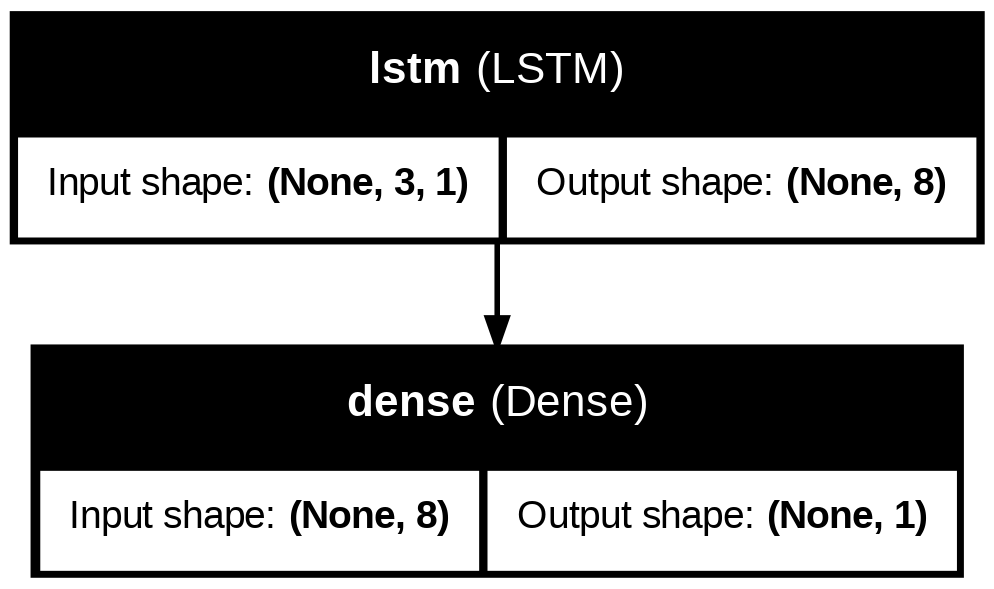

In [23]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [24]:
# Predições
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [25]:
# Faz a transformação inversa das predições
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [26]:
# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.47 RMSE
Test Score: 48.49 RMSE


In [27]:
# Prepara o vetor para plotagem do conjunto de treinamento
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back-1:len(trainPredict)+look_back-1, :] = trainPredict

In [28]:
# Prepara o vetor para plotagem do conjunto das predições
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(X)-2, :] = testPredict

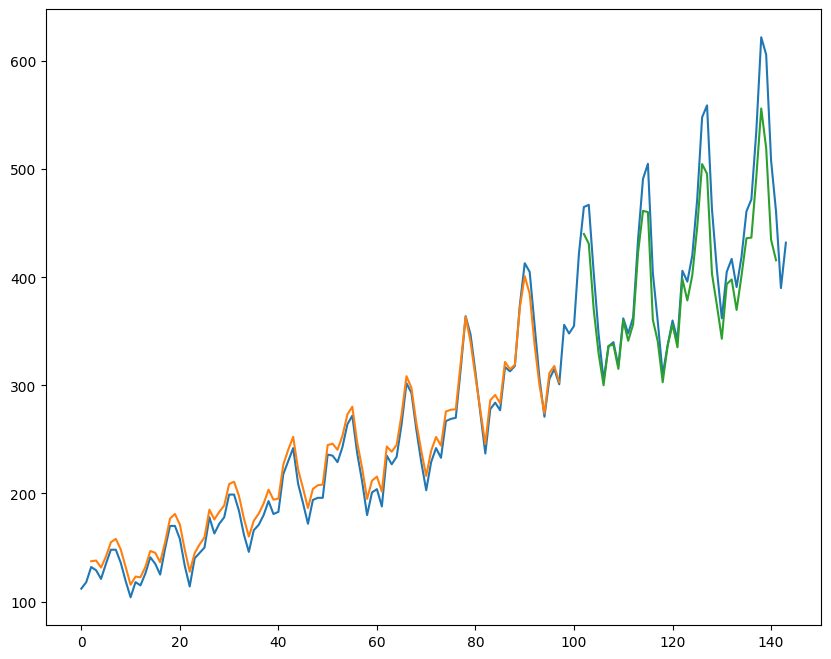

In [29]:
# Plota o dataset, as predições sobre o conjunto de treinamento e teste
plt.figure(figsize=(10,8))
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()